In [11]:
import sys
sys.path.append("../")

from utils import *
from tqdm.auto import tqdm
from generate_parameter_sample import PARAMETER_RANGES
from SALib.analyze import pawn, morris, delta
import numpy as np
import pickle
import os

import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": False, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [6]:
data = {}
for model in ["eut", "pt", "cpt"]:
    with open(f"../{model}_sen_welfare", 'rb') as f:
        sen = pickle.load(f)
    X = []
    Y = []
    for i,f in tqdm(enumerate(os.listdir(f"../{model}"))):
        with open(os.path.join(f"../{model}", f), "rb") as file:
            P = pickle.load(file)["params"]
        if model == "eut":
           X.append((P["alpha"],P["rate"],P["A"]))
        elif model == "pt":
            X.append((P["alpha"],P["lambda"],P["rate"],P["A"]))    
        else:
            X.append((P["alpha"],P["gamma"],P["lambda"],P["rate"],P["A"]))    
        Y.append(sen[i])
    data[model] = (X,Y)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

/Users/charlesdupont/Documents/code/wealth-health/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/charlesdupont/Documents/code/wealth-health/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/charlesdupont/Documents/code/wealth-health/.venv/lib/python3.13/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


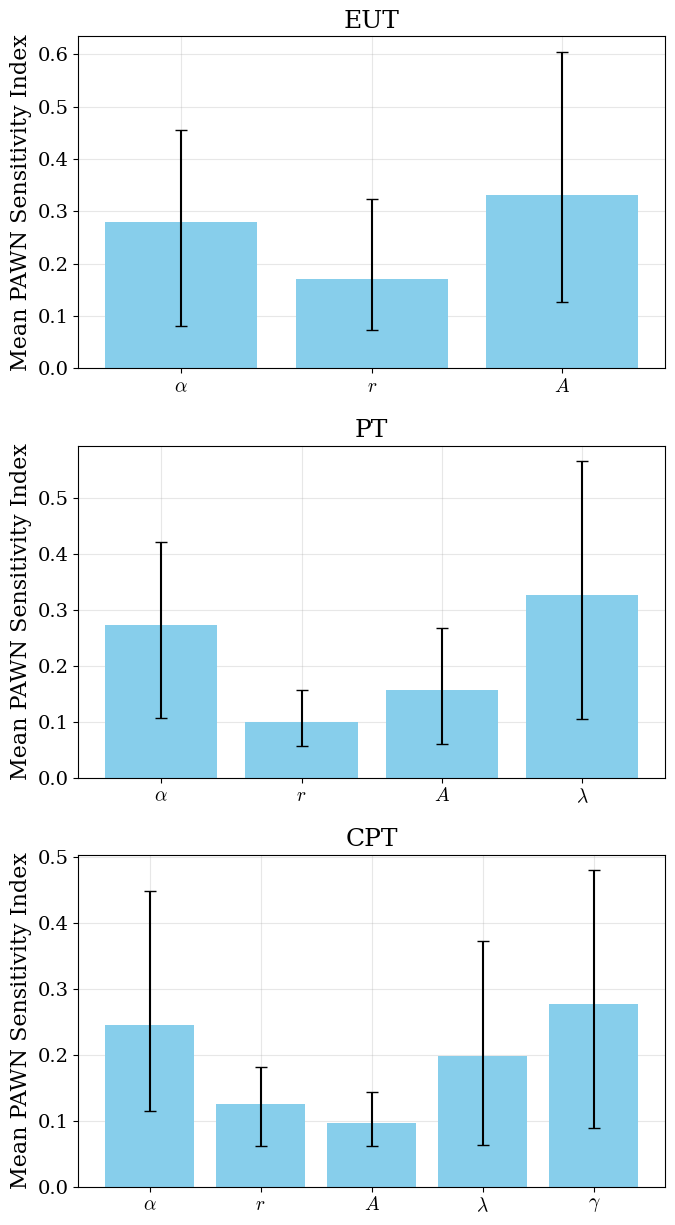

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(7,12.5))
for i,key in enumerate(["eut", "pt", "cpt"]):
    if key == "cpt":
        problem = {
            'num_vars': 5,
            'names': [r"$\alpha$", r"$r$",  r"$A$", r"$\lambda$", r"$\gamma$",],
            'bounds': [PARAMETER_RANGES[k] for k in ["alpha", "rate", "A", "lambda", "gamma"]]
        }
    elif key == "eut":
        problem = {
            'num_vars': 3,
            'names': [r"$\alpha$", r"$r$",  r"$A$"],
            'bounds': [PARAMETER_RANGES[k] for k in ["alpha", "rate", "A"]]
        }
    else:
        problem = {
            'num_vars': 4,
            'names': [r"$\alpha$", r"$r$",  r"$A$", r"$\lambda$"],
            'bounds': [PARAMETER_RANGES[k] for k in ["alpha", "rate", "A", "lambda"]]
        }
    

    X, Y = data[key]
    results = pawn.analyze(problem, np.array(X), np.array(Y))
    x = np.arange(len(results['names']))
    axs[i].bar(x, results['mean'], color='skyblue', label='Mean PAWN index')
    axs[i].errorbar(
        x,
        results['mean'],
        yerr=[results['mean'] - results['minimum'], results['maximum'] - results['mean']],
        fmt='none',
        ecolor='black',
        capsize=4
    )

    axs[i].set_xticks(x, results['names'])
    axs[i].set_ylabel("Mean PAWN Sensitivity Index")
    axs[i].set_title(f"{key.upper()}")
    axs[i].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("../figures/pawn_gsa.pdf", bbox_inches="tight")
plt.show()    